In [1]:
#in_rds = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/annotation/gff_A2_black/mergedSamples/allSamples.integrated.rds" 
se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b2/InputOnly/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/SE.rds"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b2/InputOnly/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/pseudotime"
order_f = ""
#"/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/annotation/gff_A2_black/mergedSamples/" 

In [2]:
# BiocManager::install("Rsamtools")
# install.packages("Signac")
#library(BiocManager)
## have to do this because the remotes package has stupid defaults
## and will error on something as trivial as a binary package being built on a slightly different R version
#Sys.setenv(R_REMOTES_NO_ERRORS_FROM_WARNINGS = "true")
#BiocManager::install("cole-trapnell-lab/monocle3")
#install.packages('R.utils')
#remotes::install_github('satijalab/seurat-wrappers')

library(monocle3)
library(Signac)
library(Seurat)
library(SeuratWrappers)
library(Matrix)
library(ggplot2)
library(patchwork)
set.seed(1234)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading requir

In [3]:
se <- readRDS(se_f)

In [4]:
se

An object of class Seurat 
112098 features across 4657 samples within 2 assays 
Active assay: RNA (19039 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: lsi, umap

In [5]:
DefaultAssay(se) <- "ATAC"


In [6]:
se.cds <- as.cell_data_set(se)
se.cds <- cluster_cells(cds = se.cds, reduction_method = "UMAP")
se.cds <- learn_graph(se.cds, use_partition = TRUE)


Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”
Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”
Warning message in .check_reddim_names(x, value[[v]], withDimnames = TRUE, vname = sprintf("value[[%s]]", :
“non-NULL 'rownames(value[[1]])' should be the same as 'colnames(x)' for
'reducedDims<-'. This will be an error in the next release of
Bioconductor.”
Warning message in .check_reddim_names(x, value[[v]], withDimnames = TRUE, vname = sprintf("value[[%s]]", :
“non-NULL 'rownames(value[[2]])' should be the same as 'colnames(x)' for
'reducedDims<-'. This will be an error in the next release of
Bioconductor.”
Warning message:
“Monocle 3 trajectories require cluster partitions,

  |======================================================================| 100%


Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”


  |======================================================================| 100%


Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”


Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


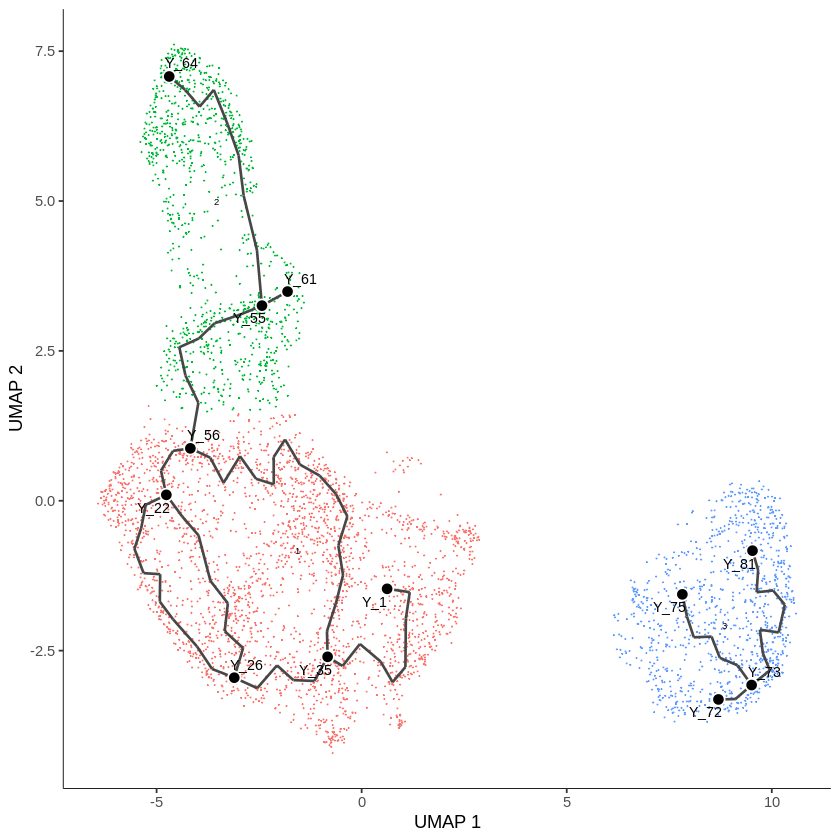

In [7]:
# plot trajectories colored by pseudotime
plot_cells(
  cds = se.cds,
  show_trajectory_graph = TRUE, label_principal_points = TRUE
)

In [9]:
# order cells
# interactive more or not
if (order_f == ""){
   se.cds <- order_cells(se.cds, reduction_method = "UMAP", root_pr_nodes = c('Y_56')) 
}else{
    se.cds <- order_cells(se.cds, reduction_method = "UMAP", root_cells = hsc)
}

Cells aren't colored in a way that allows them to be grouped.



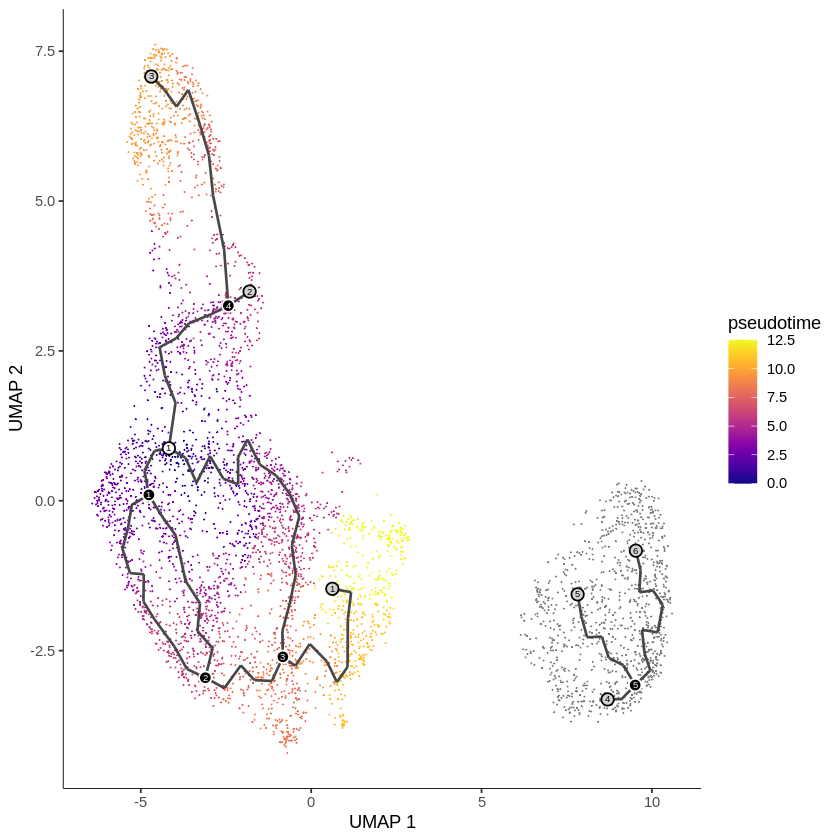

In [10]:
# plot trajectories colored by pseudotime
plot_cells(
  cds = se.cds,
  color_cells_by = "pseudotime",
  show_trajectory_graph = TRUE
)

In [ ]:
# de_res <- graph_test(se.cds, neighbor_graph = "principal_graph", cores = 3)

# genes_plt <- c("Ube2c", "Mrps12", "Hspa12a", "Igfbp3")
# plot_cells(cds, genes = genes_plt,
#            show_trajectory_graph = FALSE,
#            label_cell_groups = FALSE,
#            label_leaves = FALSE)

In [11]:
se <- AddMetaData(
  object = se,
  metadata = se.cds@principal_graph_aux@listData$UMAP$pseudotime,
  col.name = "pseudotime"
)


In [12]:
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,pseudotime
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<dbl>,<int>,<chr>,<I<chr>>,<fct>,<fct>,<fct>,<fct>,<dbl>
Input_AAACGAAAGCCGCAAA-1,Input,1032,1032,16081,1250,25,60,379,11724,2643,⋯,0,1415,1256,AAACGAAAGCCGCAAA-1_Input,Input_AAACGAAAGCCGCAAA-1,56,1,Input,1_56,7.365268
Input_AAACGAACAGATGGCA-1,Input,5950,5950,44699,10292,190,169,1753,15193,17102,⋯,9,10336,6192,AAACGAACAGATGGCA-1_Input,Input_AAACGAACAGATGGCA-1,4,1,Input,1_4,8.258679
Input_AAACGAAGTATGTTCG-1,Input,3926,3926,21594,5059,133,91,784,8125,7402,⋯,3,4787,3580,AAACGAAGTATGTTCG-1_Input,Input_AAACGAAGTATGTTCG-1,2,0,Input,0_2,3.037994
Input_AAACGAAGTCATTGGT-1,Input,524,524,9191,460,12,19,137,7471,1092,⋯,8,650,616,AAACGAAGTCATTGGT-1_Input,Input_AAACGAAGTCATTGGT-1,8,0,Input,0_8,2.949953
Input_AAACGAATCAGAGTGG-1,Input,1558,1558,10961,1743,56,43,289,4957,3873,⋯,8,2246,1879,AAACGAATCAGAGTGG-1_Input,Input_AAACGAATCAGAGTGG-1,8,1,Input,1_8,6.786427
Input_AAACGAATCCGGACTG-1,Input,2117,2117,15146,1793,52,50,388,9290,3573,⋯,0,2543,2159,AAACGAATCCGGACTG-1_Input,Input_AAACGAATCCGGACTG-1,1,0,Input,0_1,7.205701
Input_AAACTCGAGCGCATTT-1,Input,4999,4999,29323,7996,156,119,1188,8268,11596,⋯,7,7092,4769,AAACTCGAGCGCATTT-1_Input,Input_AAACTCGAGCGCATTT-1,0,1,Input,1_0,3.149877
Input_AAACTCGAGGCACCTC-1,Input,4280,4280,27630,6461,95,93,1146,10375,9460,⋯,9,6145,4370,AAACTCGAGGCACCTC-1_Input,Input_AAACTCGAGGCACCTC-1,18,0,Input,0_18,8.258679
Input_AAACTCGCATTTGGCA-1,Input,552,552,6430,706,24,20,172,4151,1357,⋯,3,803,741,AAACTCGCATTTGGCA-1_Input,Input_AAACTCGCATTTGGCA-1,6,1,Input,1_6,6.486581


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image



ERROR: Error in grid.newpage(): could not open file '/data/Mito_Trace/output/pipeline/v02/CHIP_b2/InputOnly/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/gff_A2_black/annotation_clones/pseudotime/SE.pseudotime.png'


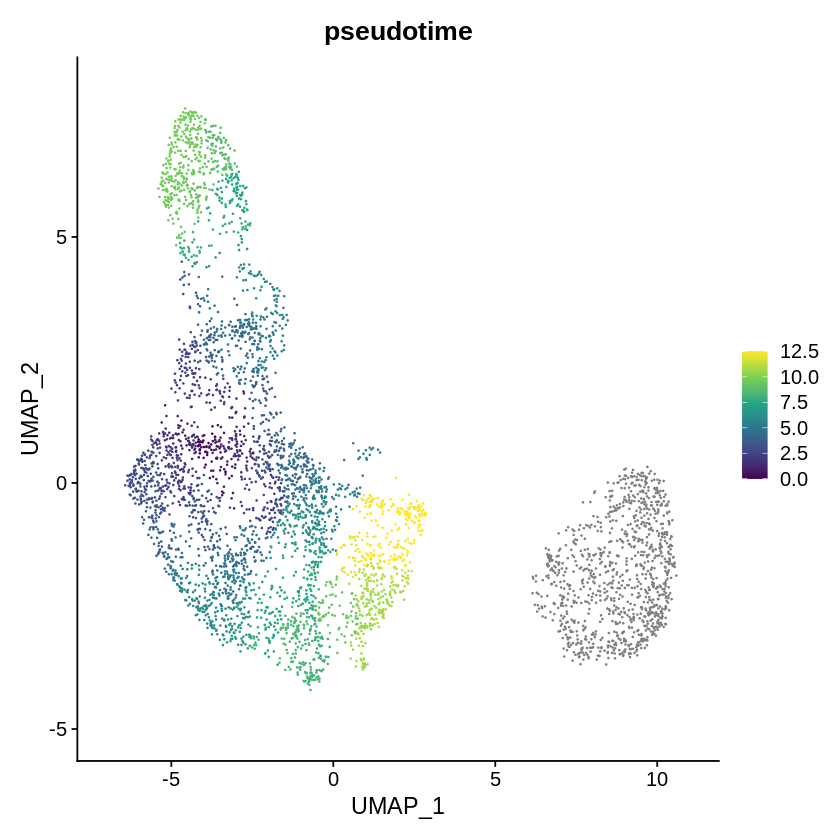

In [15]:
FeaturePlot(se, c("pseudotime"), pt.size = 0.1) & scale_color_viridis_c()
ggsave(file.path(outdir, "SE.pseudotime.png"))
FeaturePlot(se, c("nCount_ATAC"), pt.size = 0.1) & scale_color_viridis_c()
ggsave(file.path(outdir, "SE.pseudotime.nCountPeaks.png"))




In [ ]:
saveRDS(se, file.path(outdir, "SE.pseudotime.rds"))